<center><h1><title>Henry's notebook for Stats for Data Science Assignment</title></h1>
    <br>
<h2>A Notebook sample for the Boston housing market.</h2></center>

Welcome to this report on the state of the Boston housing market for our housing agency. This report has been prepared for upper management to help inform them of factors impacting the Median Value of owner-occupied homes in Boston. Before continuing, please make sure to run all cells within this document starting with the cell below this introduction.

In [1]:
#install everything!
%pip install pip
%pip install pandas
%pip install numpy
%pip install scipy
%pip install seaborn
%pip install matplotlib
%pip install statsmodels


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Gonna do the numpy and Pandas bit plus statsmodels.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as sci
import seaborn as sns
import seaborn.objects as so
from math import sqrt

Next up is to retrieve the Boston housing info that will serve as the dataset for all of the information below:

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

boston_df=pd.read_csv(boston_url)
boston_df.reset_index()


,index,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [4]:
#run to display info.
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


To save time and for the purposes of presentation, Discretising the age variable (AGE) of owner-occupied units into three groups for Task 4, Figure 3 and Task 5, Question 2 is done here along with a Levene test on to test for equality of variance.

In [5]:
#First, group the three variables into categories:
boston_df.loc[(boston_df["AGE"] <= 35), "age_group"] = '35 years and newer'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), "age_group"] = 'between 35 and 70 years old'
boston_df.loc[(boston_df["AGE"] >= 70), "age_group"] = '70 years and older'

#Sort the three samples into variables for each.
thirtyfive_lower = boston_df[boston_df["age_group"] == '35 years and newer']
thirtyfive_seventy = boston_df[boston_df["age_group"] == 'Between 35 and 70 years old']
seventy_older = boston_df[boston_df["age_group"] == '70 years and older']

#Run a Levene test for equality of variance.
sci.levene(boston_df[boston_df["age_group"] == '35 years and newer']["MEDV"],
boston_df[boston_df["age_group"] == "between 35 and 70 years old"]["MEDV"],
boston_df[boston_df["age_group"] == "70 years and older"]["MEDV"],
center = "mean")

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

<center><h3>Task 4: Decriptive Statistics and Visualisations for Upper Management:</h3></center>
<br>
Below are five visualisations representing the Median Value (MEDV) of owner-occupied homes in the "city" of Boston. These will illustrate for upper management the possible variables that might or might not impact the Median Value of the agency's homes. These visualisations will factor into – and precede – four key questions for upper management to consider in the impacts of Median Value of homes.
<p>
<b><ul>Figure 1: The Median Value (MEDV) of owner-occupied homes.
<p>
<p>
Figure 2. The number of homes bounded by the Charles River.
<p>
Figure 3. A comparison of Median Value of owner-occupied homes vs the Age (AGE) of those homes, broken into three groups: 35 years or younger, between  35 and 70 years old, and 70 years and older.
<p>
Figure 4. An Illustration of the relationship between Nitric oxide (NO) concentrations and the proportions of non-retail business acres per town (NOX).
<p>
Figure 5. The ratio of pupils to teachers (PTRATIO).
</ul></b>
<p>
<p>
<hr>

<h4>Figure 1. The Median Value of owner-occupied homes.</h4>
<p>
This figure displays the median valure of owner-occupied homes. The variable that upper management is most interested in and against which most other factors (variables) will be compared.

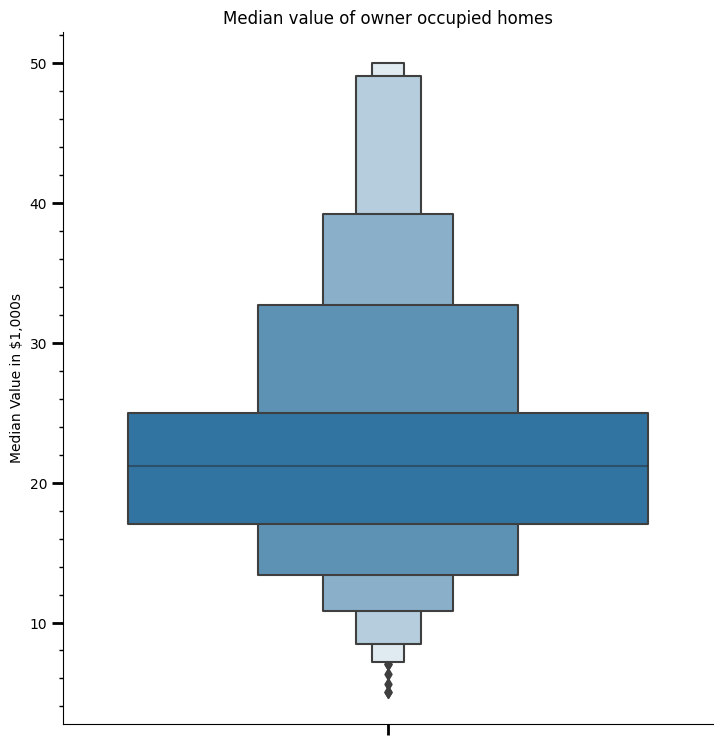

In [6]:
#Instead of a regular box plot, use a boxen plot to show more detail for the Median Value.
ax = sns.catplot(y='MEDV', data=boston_df, kind = "boxen", height=7.27)
plt.ylabel("Median Value in $1,000s")
plt.title("Median value of owner occupied homes")
ax1 = plt.subplot()
ax1.minorticks_on()
ax1.tick_params('both', length=8, width=2, which='major')
ax1.tick_params('both', length=3, width=1, which='minor')
plt.rcParams["figure.figsize"] = [8.0, 9.50]
plt.show()

<hr>
<h4>Figure 2. Homes along the Charles River</h4>
<p>
This figure displays the number of homes bounded by the Charles River.

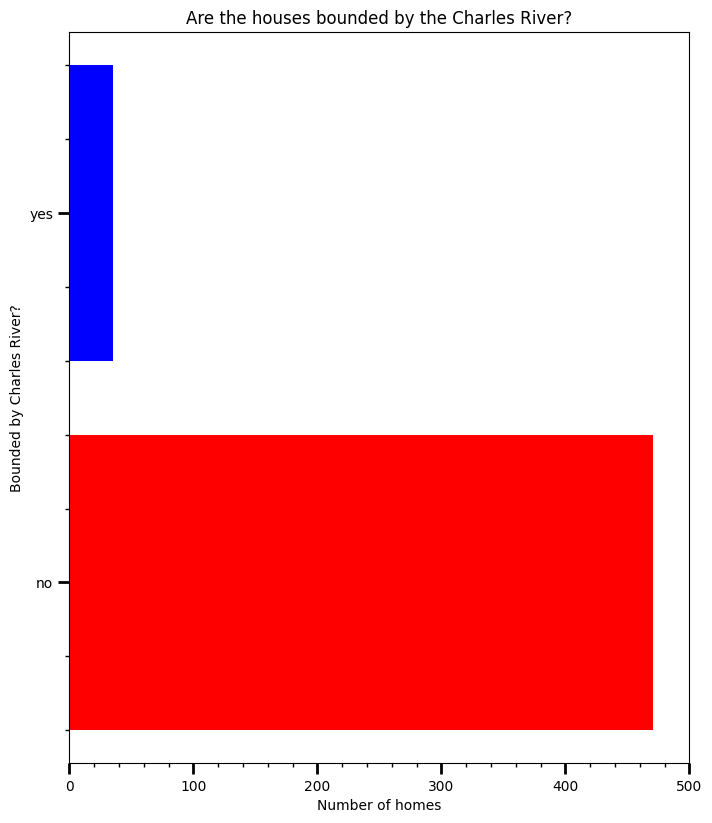

In [7]:
#Run a horizontal bar plot for best appearance.
plt.barh(boston_df.CHAS.unique(), boston_df.CHAS.value_counts(), tick_label =['no', 'yes'], color =['red', 'blue'])
plt.xlim(right=500, left =0)
plt.ylabel('Bounded by Charles River?')
plt.xlabel('Number of homes')
plt.title('Are the houses bounded by the Charles River?')
ax1 = plt.subplot()
ax1.minorticks_on()
ax1.tick_params('both', length=8, width=2, which='major')
ax1.tick_params('both', length=3, width=1, which='minor')
plt.rcParams["figure.figsize"] = [8.0, 4.50]
plt.rcParams["figure.autolayout"] = True
plt.show()

<hr>
<h4>Figure 3. Median Value by Home Age</h4>
<p>
This figure displays a comparison of the Median Value of owner-occupied units divided into three age groups: 35 years or newer, between 35 and 70 years old, and 70 years or older.

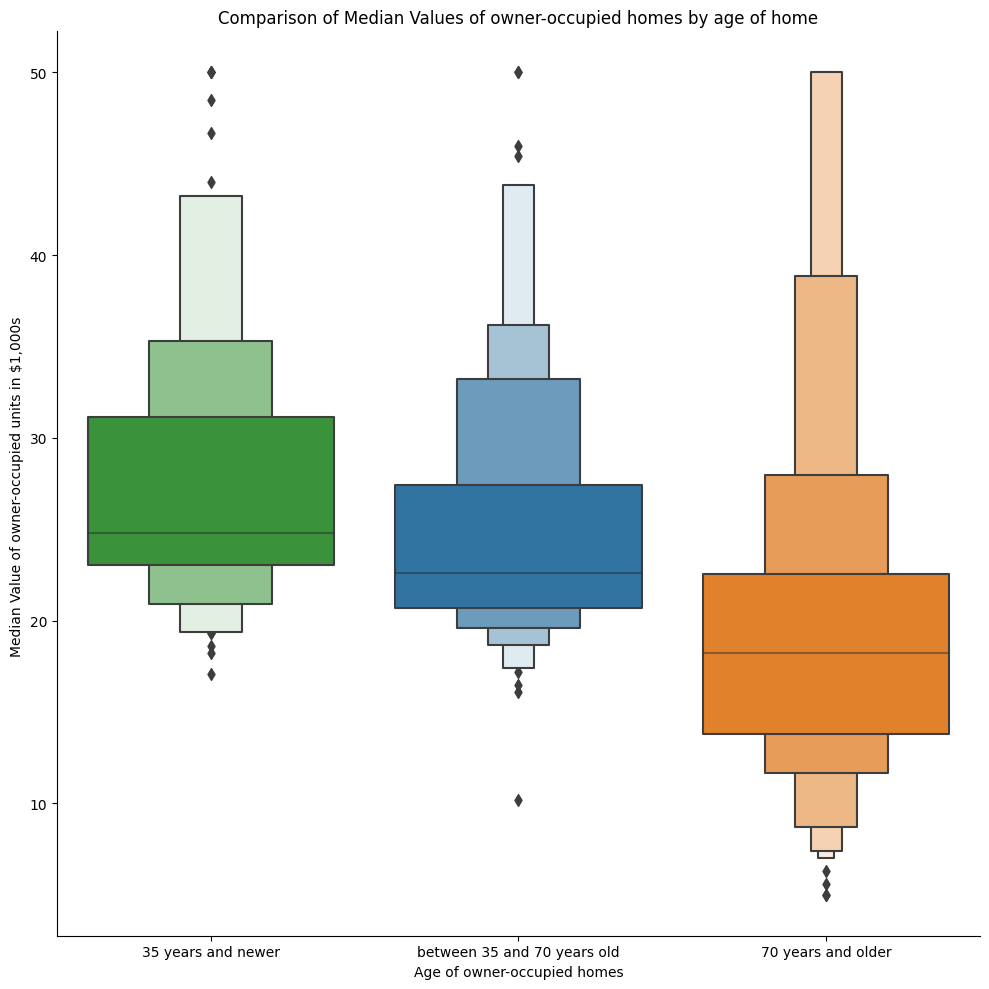

In [8]:
#For readability, place the age groups in order within the order variable. Make sure that these names match those above where the categories were first organised.
ax = sns.catplot(data=boston_df, x="age_group", y="MEDV", hue="age_group", kind="boxen", order=["35 years and newer", "between 35 and 70 years old", "70 years and older"], height = 10, aspect= 1, dodge=False)
plt.ylabel("Median Value of owner-occupied units in $1,000s ")
plt.xlabel("Age of owner-occupied homes")
plt.title("Comparison of Median Values of owner-occupied homes by age of home")
plt.rcParams.update({"figure.dpi": 80})
plt.show()

<hr>
<h4>Figure 4. Non-retail business acreage and nitric oxide concentrations.</h4>
<p>
An illustration of the relationship between nitric oxide concentrations and the proportions of non-retail business acres (industry) per acre.

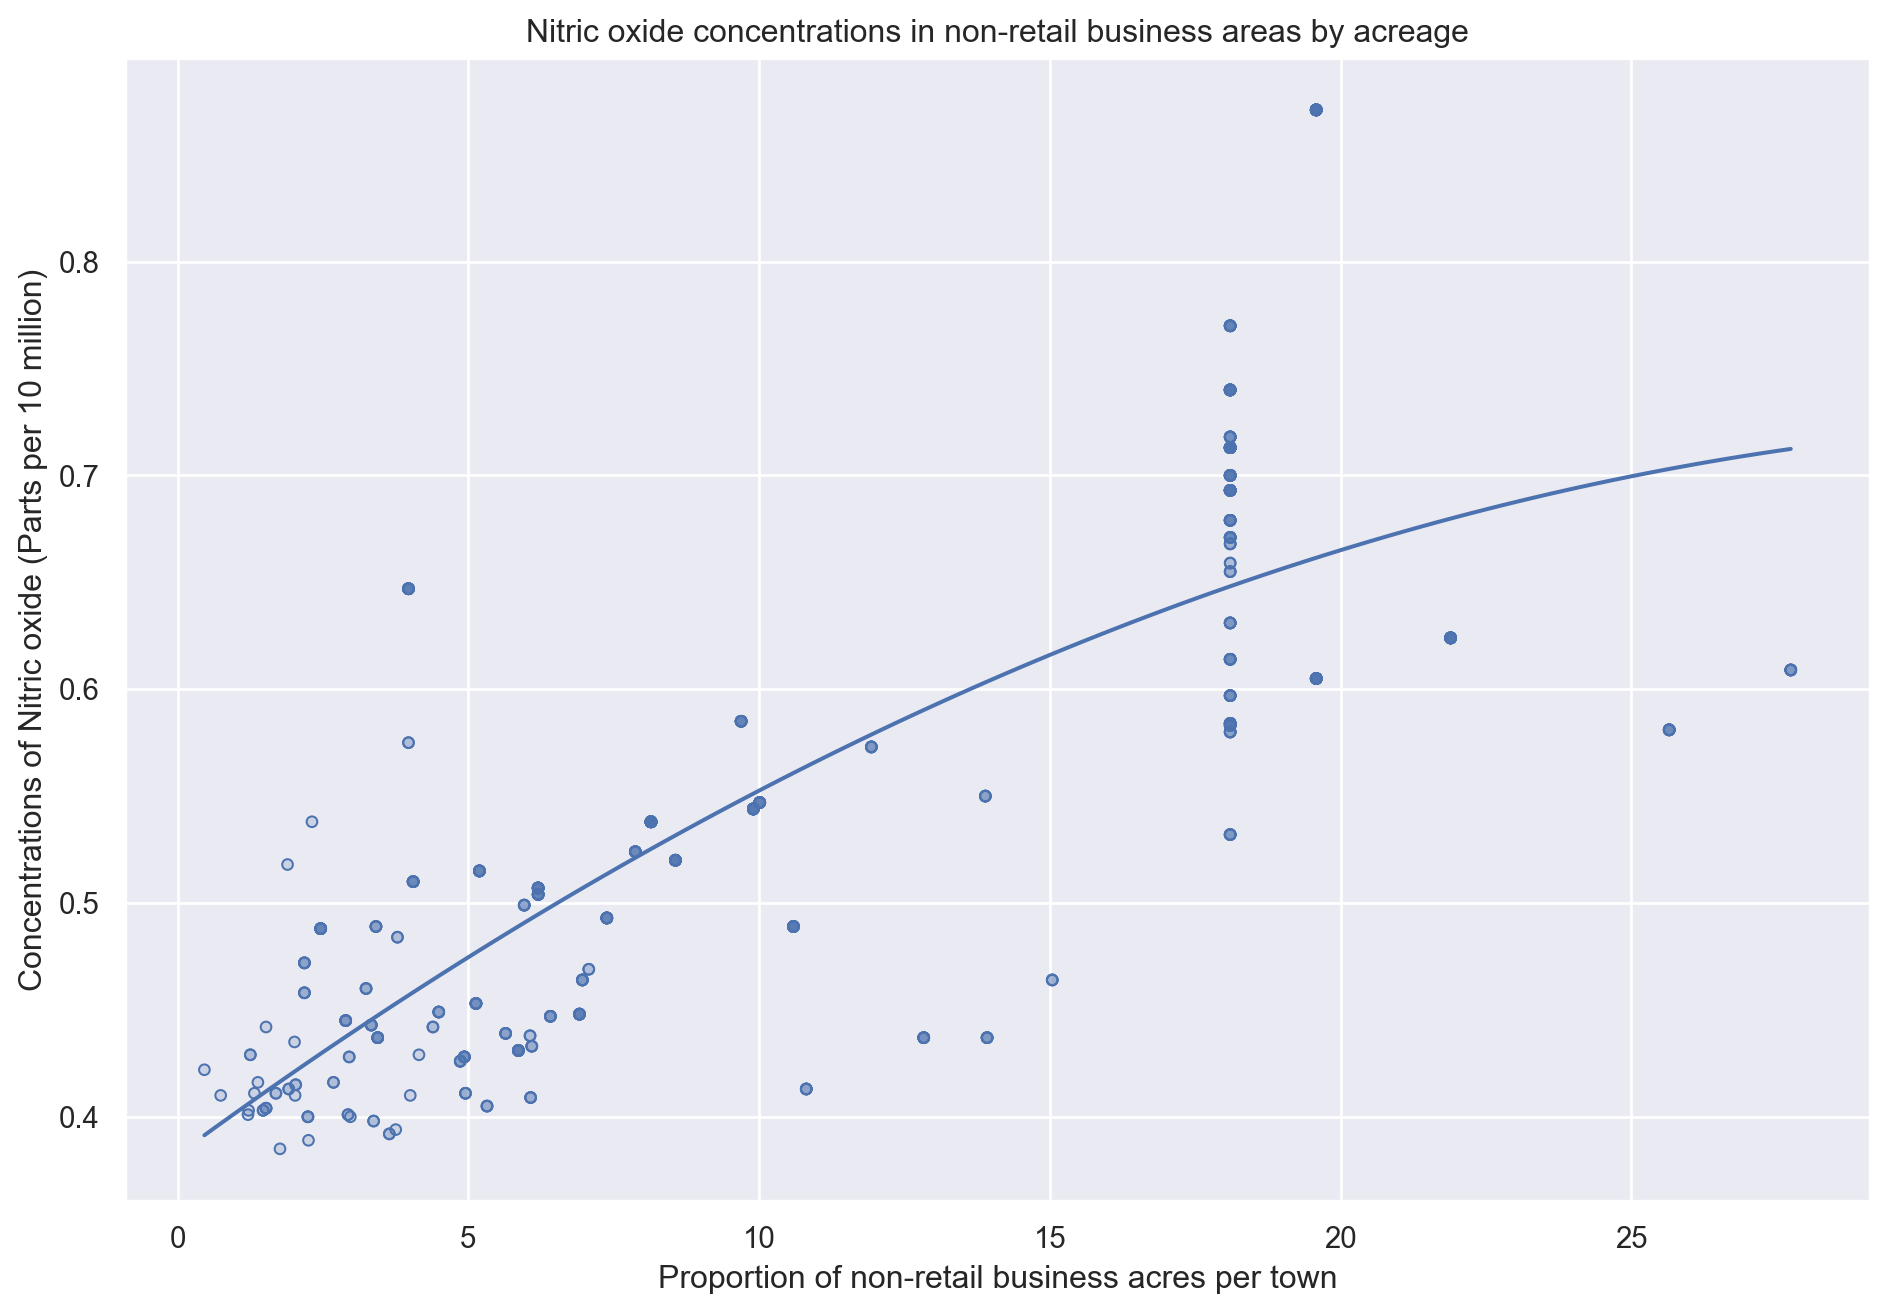

In [9]:
#The optimal way to represent this is the Seaborn Object Scatter Plot with some extra trimmings.
(so.Plot(data=boston_df, x="INDUS", y="NOX")
 .add(so.Dots())
 .add(so.Line(), so.PolyFit(order=2, gridsize=100))
 .label(
    x="Proportion of non-retail business acres per town", y = "Concentrations of Nitric oxide (Parts per 10 million)",
    color = str.capitalize,
    title = "Nitric oxide concentrations in non-retail business areas by acreage"
 )
 #The inclusion of the .layout command is necessary to avoid a microscopic graph:
 .layout(size=(10, 7))
)

Based on the visual in Figure 4, there appears to be a relationship between the concentration of non-retail business acres (industrial areas) and concentrations of nitric oxide.

<i>Nitric oxide and safety</i>: Nitric oxide (NO) is a colorless gas and is an oxide of nitrogen. OSHA and NIOSH has set the legal limit for nitric oxide exposure at 25 ppm (30.69 mg/m<super>3</super>)  in any given 8-hour workday. 100 ppm (122.74 mg/m<super>3</super>) or more may be potentially dangerous or fatal. <a href ="https://www.cdc.gov/niosh/npg/npgd0448.html">NIOSH reccomendations</a>

<hr>
<h4>Figure 5.</b> The Ratio of Pupils to Teachers (PTRATIO) by Town.</h4>
<p>
This figure illustrates the how many pupils (students) there are for each teacher. A crucial consideration for those with school-age children or considering starting a family.

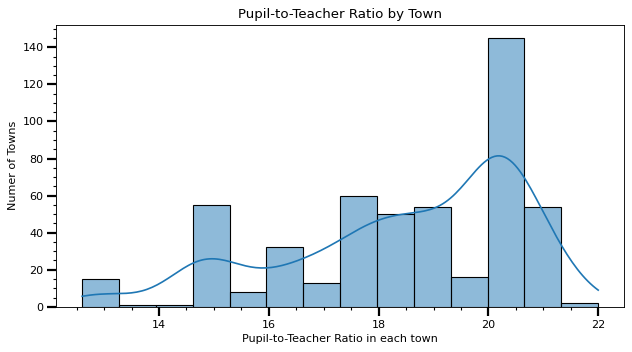

In [10]:
#We use Seaborn Library's histplot function as some of the others are depricated now.
sns.histplot(data=boston_df, x = "PTRATIO", stat ="count", kde=True)
sns.color_palette("Spectral", 8, as_cmap=True)
plt.xlabel("Pupil-to-Teacher Ratio in each town")
plt.ylabel("Numer of Towns")
plt.title("Pupil-to-Teacher Ratio by Town")
ax1 = plt.subplot()
ax1.minorticks_on()
ax1.tick_params('both', length=8, width=2, which='major')
ax1.tick_params('both', length=3, width=1, which='minor')
plt.rcParams["figure.figsize"] = [8.0, 8.50]
plt.show()

<hr>
<hr>
<p>
<center><h3> Task 5 Answers</h3></center>
<h4>Next, there are four questions for upper management to consider based on the data, and preferably by using the follow tests identified in parenthesis after the question:</h4>
    
1. Is there a significant difference in median value of houses bounded by the Charles River or not? (T-test for independent samples)

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4. What is the impact of an additional weighted distance  to the five Boston employment centers on the Median Value (MEDV) of owner occupied homes? (Regression analysis)
    
 

<hr>
<h3> Question 1: Is there a significant difference in Median Value (MEDV) of houses bounded by the Charles River (CHAS) or not?</h3>

<i>The null hypothesis is:</i>
<br>
<b>H_0 = µ_1 = µ_2</b> - There is <b>no</b> signifcant difference in the Median Value of homes bounded by the Charles River. The mean of Median Value of Houses bounded by the Charles River (µ_1) would be the same as the mean of the Median value of houses that are <b>not</b> bounded by the Charles River (µ_2).
<p>
This would mean that if we run a T-Test and subtract µ_1 from µ_2, the result = 0. 
<p>
<i>The Alternative hypothesis is:</i>
<br>
<b>H_1 = µ_1 != µ_2</b> - There <b>is</b> a significant difference in the Median Value of homes bounded by the Charles River vs homes <b>not</b> bounded by the Charles River, which could come out one of three ways:
<p>
<i>Alternative 1:</i> µ_1 - µ_2 != 0 - The difference in means is not equal to zero.
<br>
<i>Alternative 2:</i> µ_1 - µ_2 > 0 - The difference in means is greater than zero (The homes bounded by the Charles River have a higher Median Value on average.)
<br>
<i>Alternative 3:</i> µ_1 - µ_2 < 0 - The difference is less than zero (The homes <b>not</b> bounded by the Charles River have a higher Median Value on average.)

In [11]:
#First, run a Levene test to establish whether there is equal variance between the two variables.
#When comparing categories with binary values such as CHAS, remember that the values are integers, not strings.
sci.levene(boston_df[boston_df["CHAS"] == 1]["MEDV"], 
           boston_df[boston_df["CHAS"] == 0]["MEDV"], center="mean")

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

<hr>
<h3>Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?</h3>
<p>
For the purposes of this question, the owner-occupied units are divided into three age groups: 35 years and newer, between 35 and 70 years old, and 70 years or older.
<p>
<p>
    <i>The null hypothesis is:</i><br>
<b>H_0: µ_1 = µ_2 = µ_3</b> - There would be no significant variation in the Median Value of homes by their ages.
<p>
    <i>The alternative hypothesis is:</i><br>
<b>H_1: µ_1 != µ_2 OR µ_2 != µ_3 OR µ_3 != µ_1 </b> - There will be a significant variation between the Median Value in at least one of the age groups compared to the other two or all three age groups will show different Median Values.

Run a one-way ANOVA using the three age group samples:

In [12]:
thirtyfive_lower_MEDV = boston_df[boston_df["age_group"] == '35 years and newer']['MEDV']
thirtyfive_seventy_MEDV = boston_df[boston_df["age_group"] == 'Between 35 and 70 years old']['MEDV']
seventy_older_MEDV = boston_df[boston_df["age_group"] == '70 years and older']['MEDV']

#Now run that one-way ANOVA based on the information in Figure 3 above.
f_statistic, p_value = sci.f_oneway(thirtyfive_lower_MEDV, thirtyfive_seventy_MEDV, seventy_older_MEDV)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: nan, P-Value: nan


c:\Users\hpelg\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


<hr>
<h3>Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?</h3>
<p>
This question deals with concentrations of the common free radical, Nitric Oxide (NO). As mentioned in Figure 4, this gas can be toxic in certain concentrations.
<p>
<p>
    <i>The null hypothesis is:</i><br>
<b>H_0:</b> There is no relationship between Nitric oxide concentrations and proportions of non-retail business acres per town.
<p>
    <i>The alternative hypothesis is:</i><br>
<b>H_1:</b> There is a relationship between Nitric oxide concentrations and proportions of non-retail business acres per town.
<p>
<p>
To answer this question, we will perform a Pearson Correlation Test to see if the acreage of non-retail businesses per town indeed influences nitric oxide concentrations.

In [13]:
#Place the independent variable (INDUS) first and then the dependent variable (NOX) within the square brackets.
sci.pearsonr(boston_df["INDUS"], boston_df["NOX"])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.913361061233745e-98)

<b>Conclusion:</b> The Pearson Coefficient of <b>0.76</b> suggests a strong relationship between the Nitric oxide concentrations and proportion of non-retail business acres per town. With this as well as a p-value that is to the -98th power, the null hypothesis must rejected.
<p>
Based on Figure 4 above showing a clear visual relationship between non-retail business acreage and the objective results of the Pearson Correlation Test, upper management can see there is a clear relationship between non-retail business acreage per town and the concentrations of nitric oxide. This is a key saftey factor to consider for the agency's housing units.

<hr>
<h3>Question 4: What is the impact of an additional Weighted Distance to the five Boston employment centers (DIS) on the Median Value (MEDV) of owner-occupied homes?</h3>
<p>
<i>The null hypothesis is:</i>
<br>
<b>H_0 :β1 = 0</b>  - Weighted Distance to the five Boston employment centers will have no impact on the Median Value of owner-occupied homes.
<p>
<i>The alternative hypothesis is:</i>
<br>
<b>H_1 :β1 != 0</b>  - Weighted Disance to the five Boston employment centers will have an impact on the Median Value of owner-occupied homes.

In [14]:
# We will input the weighted distance from the Boston employment centers (DIS) as our independent variable.
X = boston_df['DIS']
# Next, we have the home median home value for  owner-occupied homes (MEDV) as our dependent variable. 
y=boston_df['MEDV']
# We add the intercept (beta_0) to the model
X = sm.add_constant(X)

# We put the last bits of statsmodel's coding magic making sure both our variables are represented and that we have our prediction based on the independent variable.
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the summary to see if it worked!
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           1.21e-08
Time:                        17:49:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<center><h2>Thank you for taking the time to read through my notebook!</h2>
<p>
<img src="https://bdc2020.o0bc.com/wp-content/uploads/2023/01/animal-rescue-league-boston-cats-kittens-Aurora-A283420_2-63d2b487c37fd-scaled.jpg" alt="A small Russian Blue kitten." height = "420" width = "630"> 
<br>
<i>Image by Animal Rescue League of Boston</i>
<p>
Little Aurora here is shocked you survived all the "maffs"!</center>